# **Observações das manchas solares**



---
O **objetivo** dessa análise é mostrar um pouco mais sobre a atividade do Sol com ênfase no tópico das manchas solares. Com uma **linguegem acessível**, será feita uma visão dos momentos que mais ocorreram as manchas e quais serão as espectativas para os ciclos daqui para frente.

---
# **O que são manchas solares?**                                                  
As manchas são **efeitos temporários** na superfície do Sol, a origem desses efeitos ainda é um tanto desconhecida, mas sabe-se que existe uma relação com o campo magnético e com o ciclo de atividade solar. A temperatura das manchas podem variar entre 2000k-4000k e o **tempo que elas ficam visíveis pode ser de dias ou de meses**.

[Vídeo da NASA que mostra as manchas solares em ação](https://www.youtube.com/watch?v=6tmbeLTHC_0&feature=emb_logo)


---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
manchas_solares = pd.read_csv('/content/drive/My Drive/data_science/sunspot_data.csv')
manchas_solares

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...,...
73713,73713,2019,10,27,2019.821,0,0.0,34,0
73714,73714,2019,10,28,2019.823,0,0.0,34,0
73715,73715,2019,10,29,2019.826,0,0.0,30,0
73716,73716,2019,10,30,2019.829,0,0.0,24,0


---
Primeiramente, vou mudar os nomes das colunas para que tudo possa ficar mais simples e vou, também, construir outro dataframe para resaltar o que relamente é importante nesse momento.

In [25]:
manchas_solares.rename(columns={'Year': 'Ano', 'Observations': 'Observações', 'Number of Sunspots': 'Numero_de_Manchas',
                           'Month': 'Mês', 'Day': 'Dia', 'Standard Deviation':'Desvio_Padrão'}, inplace=True)

In [26]:
manchas_solares = manchas_solares[['Ano', 'Mês', 'Dia', 'Numero_de_Manchas', 'Desvio_Padrão', 'Observações']]
manchas_solares

,Ano,Mês,Dia,Numero_de_Manchas,Desvio_Padrão,Observações
0,1818,1,1,-1,-1.0,0
1,1818,1,2,-1,-1.0,0
2,1818,1,3,-1,-1.0,0
3,1818,1,4,-1,-1.0,0
4,1818,1,5,-1,-1.0,0
...,...,...,...,...,...,...
73713,2019,10,27,0,0.0,34
73714,2019,10,28,0,0.0,34
73715,2019,10,29,0,0.0,30
73716,2019,10,30,0,0.0,24


---
Agora vamos analisar em quais períodos as manchas solares foram mais evidentes e mais observadas. (Como os dados que foram perdidos são equivalentes a -1, não precisaremos deles.)

In [27]:
manchas_solares = manchas_solares.query('Numero_de_Manchas != -1')
manchas_solares

,Ano,Mês,Dia,Numero_de_Manchas,Desvio_Padrão,Observações
7,1818,1,8,65,10.2,1
12,1818,1,13,37,7.7,1
16,1818,1,17,77,11.1,1
17,1818,1,18,98,12.6,1
18,1818,1,19,105,13.0,1
...,...,...,...,...,...,...
73713,2019,10,27,0,0.0,34
73714,2019,10,28,0,0.0,34
73715,2019,10,29,0,0.0,30
73716,2019,10,30,0,0.0,24


In [191]:
manchas_vistas = manchas_solares['Numero_de_Manchas']
ano = manchas_solares['Ano']

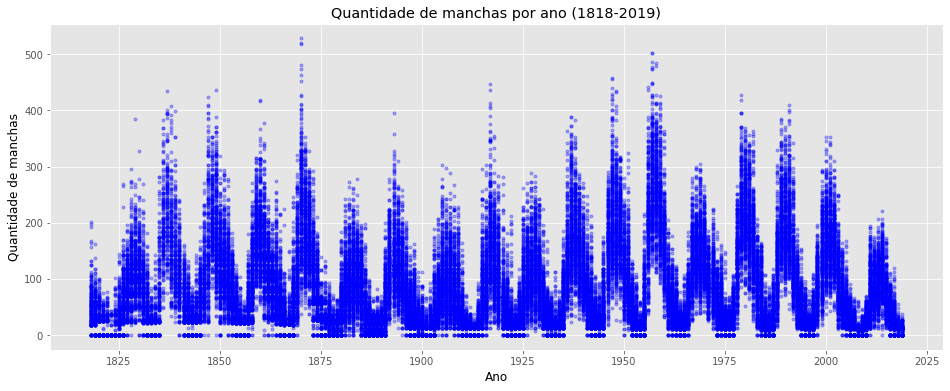

In [192]:
plt.figure(figsize=(16, 6))
plt.style.use('ggplot')
plt.title('Quantidade de manchas por ano (1818-2019)')
plt.xlabel('Ano', color='black')
plt.ylabel('Quantidade de manchas', color='black')
plt.plot(ano, manchas_vistas, '.', color='blue', alpha=0.30)
plt.show()

A partir de uma leitura rápido do gráfico acima, é possível notar que existem oscilações e intervalos quase definidos por completo, isso acontece devido ao **ciclo de atividade solar** que é de, em média, 11 anos e nesse intervalo a temperatura da coroa do Sol aumenta, deixando a situação mais favorável para as manchas acontecerem.

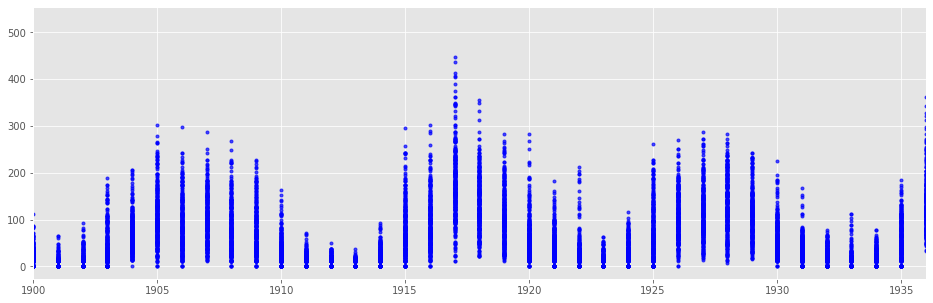

In [34]:
plt.figure(figsize=(16, 5))
plt.xlim(1900, 1936)
plt.plot(ano, manchas_vistas, '.', alpha=0.70, color='blue')
plt.show()

Restringindo a um intervalo menor, é possível perceber nitidamente que o ciclo tem duração, em média, de 11 anos. Não ficou tão claro? Pois bem, veja abaixo.

Extraindo do dataset o período que é apresentado no gráfico:

In [ ]:
ano_das_atividades = manchas_solares.query('Ano >= 1900 and Ano <= 1936')['Ano']
ano_das_atividades = list(sorted(set(ano_das_atividades)))
ano_das_atividades

Selecionando o intervalo de 11 anos:

In [184]:
periodo = ano_das_atividades[::11]

Fazendo um laço for para calcular o intervalo entre os anos:

In [185]:
for ano in range(len(periodo)):
  try:
    intervalo = periodo[ano+1] - periodo[ano]
  except:
    pass
  else:
    print(f'O intervalo de {periodo[ano]} até {periodo[ano+1]} é igual a {intervalo} anos')

O intervalo de 1900 até 1911 é igual a 11 anos
O intervalo de 1911 até 1922 é igual a 11 anos
O intervalo de 1922 até 1933 é igual a 11 anos


---
# **O mínimo solar**

O mínimo solar, diferente do máximo solar que ocorre um aumento na atividade do Sol, é marcado pela transição entre os ciclos solares e pela baixa atividade, no caso essa passagem ocorreu entre o final de 2019 até o outubro de 2020.

In [188]:
manchas_2019 = manchas_solares.query('Ano == 2019')['Numero_de_Manchas']
manchas_2019

73414    12
73415    15
73416    15
73417    13
73418    11
         ..
73713     0
73714     0
73715     0
73716     0
73717     0
Name: Numero_de_Manchas, Length: 304, dtype: int64

Detalhe: os índices que vão de 73414 até 73717 representam os dias desse ano, no dataframe completo é possível notar que existe uma coluna para o dia, mês e ano, no ano de 2019 as observações foram até o mês 10 e é por isso que esse intervalo de 73414 até 73717 tem valor igual a 304.

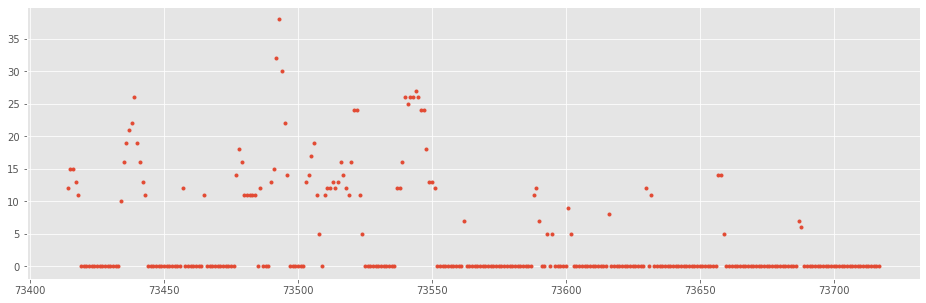

In [189]:
plt.figure(figsize=(16, 5))
plt.plot(manchas_2019, '.')
plt.show()

No caso do ano de 2019, nesse gráfico, é possível notar uma diminuição no número de manchas, que já eram poucas. Essa queda pode ter ocorrido pela transição do ciclo 24 para o 25.

---
#**O cilco 25**

Os pesquisadores estimam que o clico 25 seja um pouco mais fraco do que seus antecessores, já que está havendo uma queda de força dos ciclos desde 1980. 

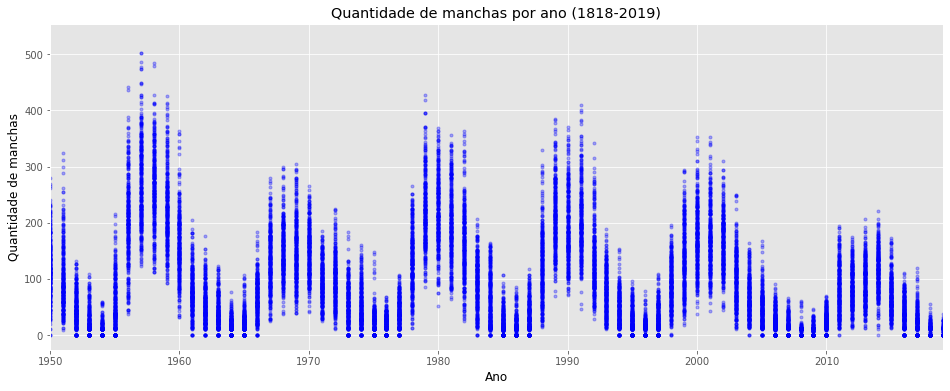

In [193]:
plt.figure(figsize=(16, 6))
plt.style.use('ggplot')
plt.title('Quantidade de manchas por ano (1818-2019)')
plt.xlim(1950, 2019)
plt.xlabel('Ano', color='black')
plt.ylabel('Quantidade de manchas', color='black')
plt.plot(ano, manchas_vistas, '.', color='blue', alpha=0.30)
plt.show()

---
#**Conclusão**

  O estudo das manchas solares, assim como o estudo do Sol de uma forma completa, é muito importante para que possamos entender os efeitos causados na Terra devido as altas atividades do Sol, prever o que pode acontecer nos próximos ciclos do Sol é fundamental para evitar futuros danos a vários objetos que estão na atmosfera terrestre, algumas atividades solares são tão fortes que podem afetar desde os sistemas de comunicação até os astronautas que estão na Estação Espacial Internacional.                                                 
  No tópico "Ciclo 25" é falado que os pesquisadores estimam que o ciclo 25 seja fraco, mas, como algumas previsões anteriores já estiveram erradas, essa pode estar também e o ciclo 25 ser um início de uma crescente na atividade dos ciclos, apesar dessa hipótese, os pesquisadores estão confiantes nos resultados, já que a tecnologia avançou com o tempo.                            
                                                                                
Observações: passe filtro solar e não olhe diretamente para o Sol sem proteção!

---
Referências

Dataset: https://www.kaggle.com/abhinand05/daily-sun-spot-data-1818-to-2019

SITE INFOESCOLA. Mancha Solar. Disponível em www.infoescola.com/astronomia/mancha-solar/. Capturado em 27/10/2020

SITE INOVAÇÃO TECNOLÓGICA. Começou o Ciclo Solar 25. 16/09/2020. Online. Disponível em www.inovacaotecnologica.com.br/noticias/noticia.php?artigo=ciclo-solar-25-comecou. Capturado em 09/11/2020.

SITE MARINHA DO BRASIL. Impactos dos fenômenos solares na atmosfera terrestre. Online. Disponível em www.marinha.mil.br/secirm/proantar/noticias/impactos. Capturado em 09/11/2020


---